# Logistic Regression Classification Part 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
# Create more data
dataset['Increase/Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Return'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset['Up_Down'] = np.where(dataset['Return'].shift(-1) > dataset['Return'],1,0)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase/Decrease,Buy_Sell_on_Open,Buy_Sell,Return,Up_Down
Date,,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658,1
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500,0
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,0,0.012106,0
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,0,0,0.000000,0
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,0,1,-0.021531,1


In [4]:
dataset.shape

(1170, 11)

In [5]:
dataset.info

<bound method DataFrame.info of                  Open   High        Low      Close  Adj Close     Volume  \
Date                                                                       
2014-01-03   3.980000   4.00   3.880000   4.000000   4.000000   22887200   
2014-01-06   4.010000   4.18   3.990000   4.130000   4.130000   42398300   
2014-01-07   4.190000   4.25   4.110000   4.180000   4.180000   42932100   
2014-01-08   4.230000   4.26   4.140000   4.180000   4.180000   30678700   
2014-01-09   4.200000   4.23   4.050000   4.090000   4.090000   30667600   
...               ...    ...        ...        ...        ...        ...   
2018-08-20  19.790001  20.08  19.350000  19.980000  19.980000   62983200   
2018-08-21  19.980000  20.42  19.860001  20.400000  20.400000   55629000   
2018-08-22  20.280001  20.92  20.209999  20.900000  20.900000   62002700   
2018-08-23  21.190001  22.32  21.139999  22.290001  22.290001  113444100   
2018-08-24  22.910000  24.00  22.670000  23.980000  23.9

In [6]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Increase/Decrease,Buy_Sell_on_Open,Buy_Sell,Return,Up_Down
count,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1.170000e+03,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
mean,7.001342,7.146650,6.855419,7.002803,7.002803,3.763371e+07,0.454701,0.505128,0.499145,0.002241,0.490598
std,4.855620,4.953517,4.754049,4.861608,4.861608,3.355409e+07,0.498157,0.500188,0.500213,0.038113,0.500125
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00,0.000000,0.000000,0.000000,-0.242291,0.000000
25%,2.710000,2.780000,2.660000,2.702500,2.702500,1.308128e+07,0.000000,0.000000,0.000000,-0.015964,0.000000
50%,4.250000,4.350000,4.175000,4.275000,4.275000,2.900380e+07,0.000000,1.000000,0.000000,0.000353,0.000000
75%,11.572500,11.775000,11.307500,11.550000,11.550000,5.059335e+07,1.000000,1.000000,1.000000,0.018227,1.000000
max,22.910000,24.000000,22.670000,23.980000,23.980000,2.683365e+08,1.000000,1.000000,1.000000,0.522901,1.000000


In [7]:
dataset.corr()

,Open,High,Low,Close,Adj Close,Volume,Increase/Decrease,Buy_Sell_on_Open,Buy_Sell,Return,Up_Down
Open,1.000000,0.999489,0.999445,0.998828,0.998828,0.666151,0.016132,0.026993,0.050314,0.024533,0.009736
High,0.999489,1.000000,0.999397,0.999530,0.999530,0.675334,0.012193,0.041462,0.049388,0.042678,0.000512
Low,0.999445,0.999397,1.000000,0.999503,0.999503,0.657002,0.021328,0.041653,0.049223,0.040212,-0.000198
Close,0.998828,0.999530,0.999503,1.000000,1.000000,0.665702,0.017975,0.053563,0.048270,0.057180,-0.008278
Adj Close,0.998828,0.999530,0.999503,1.000000,1.000000,0.665702,0.017975,0.053563,0.048270,0.057180,-0.008278
Volume,0.666151,0.675334,0.657002,0.665702,0.665702,1.000000,-0.202641,0.049329,0.026404,0.067772,-0.008714
Increase/Decrease,0.016132,0.012193,0.021328,0.017975,0.017975,-0.202641,1.000000,-0.012799,0.063354,0.019902,0.027474
Buy_Sell_on_Open,0.026993,0.041462,0.041653,0.053563,0.053563,0.049329,-0.012799,1.000000,0.078654,0.509252,-0.304150
Buy_Sell,0.050314,0.049388,0.049223,0.048270,0.048270,0.026404,0.063354,0.078654,1.000000,-0.012213,0.518009
Return,0.024533,0.042678,0.040212,0.057180,0.057180,0.067772,0.019902,0.509252,-0.012213,1.000000,-0.458735


In [8]:
dataset = dataset.drop('Return', axis=1)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase/Decrease,Buy_Sell_on_Open,Buy_Sell,Up_Down
Date,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,1
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,0,0
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,0,0,0
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,0,1,1


In [9]:
X = dataset.drop(['Up_Down', 'Close'], axis=1)  
y = dataset['Up_Down'] 

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [11]:
best_features= SelectKBest(score_func=chi2, k=3)
fit= best_features.fit(X,y)


In [12]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [13]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
2,Low,1.511257e-04
1,High,1.052673e-03
3,Adj Close,2.703764e-01
0,Open,3.731772e-01
5,Increase/Decrease,4.815789e-01
6,Buy_Sell_on_Open,5.356183e+01
7,Buy_Sell,1.572433e+02
4,Volume,2.655581e+06


In [14]:
X = dataset[['Buy_Sell_on_Open', 'Buy_Sell', 'Volume']]  # the top 3 features
y = dataset['Up_Down']   # the target output

In [15]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=100)

In [16]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_pred= model.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

            Buy_Sell_on_Open  Buy_Sell    Volume
Date                                            
2014-11-24                 1         0  12293900
2014-07-02                 1         0  20486500
2016-02-16                 0         1  11853400
2017-03-20                 1         0  91565600
2016-05-11                 1         0   7540300
...                      ...       ...       ...
2014-10-13                 0         0  38269400
2017-03-09                 1         1  45244200
2016-09-20                 0         1  28990900
2014-03-24                 1         0  20669500
2016-11-07                 1         1  36999200

[468 rows x 3 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [18]:
from sklearn import metrics
from sklearn.metrics import classification_report

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred, zero_division=1))
print('Precision: ', metrics.precision_score(y_test, y_pred, zero_division=1))
print('CL Report: ', metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.5042735042735043
Recall:  0.0
Precision:  1.0
CL Report:                precision    recall  f1-score   support

           0       0.50      1.00      0.67       236
           1       1.00      0.00      0.00       232

    accuracy                           0.50       468
   macro avg       0.75      0.50      0.34       468
weighted avg       0.75      0.50      0.34       468



In [19]:
y_pred_proba= model.predict_proba(X_test)[::,1]

In [20]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

In [21]:
auc= metrics.roc_auc_score(y_test, y_pred_proba)

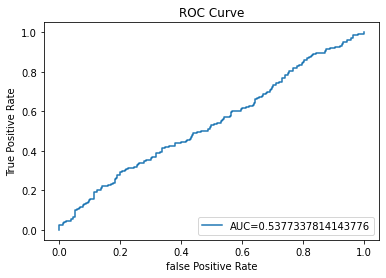

In [22]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)